# Curve fitting - Linear regression

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Least-squares regression

Let's assume the given set of data is denoted as $(x_i, y_i)$, $i\in(0,N-1)$. Here the total number of data points is $N$. Note that here the index starts at 0 to be consistent with the zero-based index in Python. In lecture notes and the book, the index starts at 1. 

### Linear regression analysis

The goal of linear regression analysis is to find a linear function (straight line) which fits the given set of data points best. The linear function can be written as 
\begin{equation}
   y = a_0 + a_1 x + e
\end{equation}
where $a_0$ and $a_1$ are regression coefficients representing the intercept and slope, respectively. $e$ is the error or residual, which is the distance between the given function value and the predicted one. Among many other definitions, the criterion used here for "best" fit is to minimize the sum of the squares of the residuals:
\begin{equation}
Error = \sum_{i=0}^{N-1} e_i^2 = \sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i \right)^2
\end{equation}

To minimize the error, taking derivative with respect to the two coefficient $a_0$ and $a_1$ and making them to be zero, one gets
\begin{equation}
\frac{dError}{da_0} = -2\sum_{i=0}^{N-1} \left(y_i - a_0 - a_1 x_i \right)=0
\end{equation}
\begin{equation}
\frac{dError}{da_1} = -2\sum_{i=0}^{N-1} \left[\left(y_i - a_0 - a_1 x_i\right) x_i \right]=0
\end{equation}
thus,
\begin{equation}
\sum_{i=0}^{N-1} y_i - \sum_{i=0}^{N-1} a_0 - \sum_{i=0}^{N-1} a_1 x_i =0
\end{equation}
\begin{equation}
\sum_{i=0}^{N-1} y_i x_i - \sum_{i=0}^{N-1} a_0 x_i - \sum_{i=0}^{N-1} a_1 x_i^2 =0
\end{equation}
which are two linear equations for the two coefficients. It is easy to show that
\begin{equation}
a_1 = \frac{n\sum_{i=0}^{N-1} y_i x_i - \sum_{i=0}^{N-1} y_i \sum_{i=0}^{N-1} x_i }{n\sum_{i=0}^{N-1} x_i^2 - (\sum_{i=0}^{N-1} x_i)^2}
\end{equation}
and 
\begin{equation}
a_0 = \overline{y} - a_1 \overline{x}
\end{equation}
where $\overline{x}$ and $\overline{y}$ are the mean values of $x$ and $y$, respectively.

Often, it is necessary to quantify how well the linear fit is. In other words, we need to quantify the error. One way to quantify is the use of "coefficient of determination" $r^2$:
\begin{equation}
r^2 = \frac{S_m - Error}{S_m} = \frac{n\sum_{i=0}^{N-1} y_i x_i - \sum_{i=0}^{N-1} y_i \sum_{i=0}^{N-1} x_i}{\sqrt{n\sum_{i=0}^{N-1} x_i^2 - (\sum_{i=0}^{N-1} x_i)^2} \sqrt{n\sum_{i=0}^{N-1} y_i^2 - (\sum_{i=0}^{N-1} y_i)^2}}
\end{equation}
where $S_m$ is the total sum of the squares of the deviation in $y$ around its mean. Thus, the difference between $S_m$ and $Error$ measures the improvement (or reduction in error) by fitting the data with a linear relation in comparison with just the mean. $r$ is called the correlation coefficient. When $r$ = 1, $Error$ is zero which means it is a perfect fit. When $r$ = 0, $Error$ is the same as $S_m$ which means the linear fit contributes no improvement over using the mean. 

The above formulas have been implemented in the function named "calculate_linear_regression_coef(...)" which returns the calculated coefficients and $r^2$. 

It is noted that in the code, we used the inner product function for vectors in Numpy. For example, **np.inner(x,x)** returns the inner product of the vector **x**, which is essentially
\begin{equation}
   np.inner(x,x) =  \sum_{i=0}^{N-1} x_i^2
\end{equation}

We also used Numpy's sum(...) function which sums up all elements of a vector. The use of these Numpy function makes the code more compact and easy to understand. You don't have to follow this in your own code, in which case you have to program all these summations.

```python
import numpy as np 

#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
	if(np.size(x) != np.size(y)):
 		sys.exit("The two vectors x and y are not of the same length.")

	# number of observations/points 
	n = np.size(x)

	sx = np.sum(x)
	sy = np.sum(y)

	sx2 = np.inner(x,x)
	sxy = np.inner(x,y)
	sy2 = np.inner(y,y)

	# calculating regression coefficients 
	a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
	a0 = sy/n - a1*sx/n

	r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

	return(a0, a1, r2) 
```

The following calls the function and demonstrates its use. 

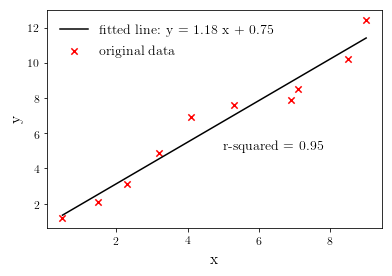

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sys


#calculate the two linear regression coefficients
#and also the r2 value
def calculate_linear_regression_coef(x, y): 
    if(np.size(x) != np.size(y)):
        sys.exit("The two vectors x and y are not of the same length.")

    # number of observations/points 
    n = np.size(x)

    sx = np.sum(x)
    sy = np.sum(y)

    sx2 = np.inner(x,x)
    sxy = np.inner(x,y)
    sy2 = np.inner(y,y)

    # calculating regression coefficients 
    a1 = (n*sxy - sx*sy)/(n*sx2 - sx**2)
    a0 = sy/n - a1*sx/n

    r2 = ((n*sxy-sx*sy)/np.sqrt(n*sx2-sx**2)/np.sqrt(n*sy2-sy**2))**2;

    return(a0, a1, r2) 


plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"

# measurement data in Numpy array format
# note: the length of x and y vectors should be the same
x = np.array([0.5, 1.5, 2.3, 3.2, 4.1, 5.3, 6.9, 7.1, 8.5, 9.0]) 
y = np.array([1.2, 2.1, 3.1, 4.9, 6.9, 7.6, 7.9, 8.5, 10.2, 12.4]) 

# calculate the linear regression coefficients 
a0, a1, r2 = calculate_linear_regression_coef(x, y) 

# plotting the original data points
plt.scatter(x, y, c = "r", marker = "x", s = 40, label='original data') 

# predicted value using the fitting curve
y_pred = a0 + a1*x 

# plotting the regression line 
plt.plot(x, y_pred, color = "k", label='fitted line: y = %.2f x + %.2f'%(a1, a0)) 

plt.text(5,5,'r-squared = %.2f'%r2, fontsize=14)

plt.xlabel('x',fontsize=16) 
plt.ylabel('y',fontsize=16) 

#show the ticks on both axes and set the font size 
plt.tick_params(axis='both', which='major', labelsize=12)

plt.legend(loc='upper left',fontsize=14,frameon=False)

plt.show() 

## Exercise

* Read and understand above code, especially in the function "calculate_linear_regression_coef(...)". You need to understand how each line inside the function corresponds to the equations of linear regression.

* Use the code above to do Problem 17.4 in the book. 

<img src="Problem_17.4_textbook.png" width=600>
<h3 align="center">Figure. Problem 17.4 in book.</h3> 
